# Wordcloud #

In [2]:
import numpy as np, pandas as pd, seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk, nltk.sentiment, sklearn
import collections
from collections import Counter
import PyPDF2
import requests

import os

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams

In [3]:
url = 'https://raw.githubusercontent.com/MatPiq/SDS-Group-35/master/Exam_Project/bow_ny.csv'

neu_df = pd.read_csv(url, delimiter = ';')
neu_words = set(neu_df['Word'])
len(neu_words)

1093

In [4]:
#Preprocessing - tokenize and lower case pdf-strings

tokenizer = nltk.tokenize.TweetTokenizer()
def preprocessing(string):
    string = string.lower()
    string = tokenizer.tokenize(string)
    return string

#Apply positive/negative sets on pdf-string

def apply_dictionary(document_elem, dictionary):
    lst = []
    for word in document_elem:
        if (word in dictionary):
            lst.append(word)
    return [lst]

#PDF extractor script. Creates a list separated per page.

def pdf_extractor(path):
    pdf_file = open(path, 'rb')
    read_pdf = PyPDF2.PdfFileReader(pdf_file)
    number_of_pages = read_pdf.getNumPages()
    c = collections.Counter(range(number_of_pages))
    res1 = []
    for i in range(len(c)):
        page = read_pdf.getPage(i)
        page_content = page.extractText()
        res1.append(page_content)
    return res1


In [5]:
basedir = r'C:\Users\sebag\Documents\GitHub\SDS Group 35\Exam_Project\Minutes_PDF'
testdir = r'C:\Users\sebag\Documents\GitHub\Exam\Test folder'

def neu_count(neu, file_path):
    neu_words = []
    i = 0
    error = []
    
    for fn in os.listdir(file_path):
        try:
            print('Now treating file: ' + fn + '\nDocument no.: ' + str(i+1))
            doc = pdf_extractor(file_path + ('/' if file_path[:3] == 'http' else '\\') + fn)
            doc = pd.Series([''.join(doc)])
            doc = doc.apply(preprocessing)

            neu_words.append(apply_dictionary(doc[0], neu))
            error.append(False)

            i += 1

            #date = re.findall(r'\d+', fn)
        except KeyError:
            neu_words.append(np.NaN)
            error.append(True)
            i += 1
        
    df = pd.DataFrame(neu_words)
    return df

Now treating file: ppp000203e.pdf
Document no.: 1


Now treating file: ppp000322e.pdf
Document no.: 2
Now treating file: ppp000504e.pdf
Document no.: 3
Now treating file: ppp000607e.pdf
Document no.: 4
Now treating file: ppp000706e.pdf
Document no.: 5
Now treating file: ppp000816e.pdf
Document no.: 6
Now treating file: ppp001024e.pdf
Document no.: 7
Now treating file: ppp001220e.pdf
Document no.: 8
Now treating file: ppp010201e.pdf
Document no.: 9
Now treating file: ppp010326e.pdf
Document no.: 10
Now treating file: ppp010426e.pdf
Document no.: 11
Now treating file: ppp010530e.pdf
Document no.: 12
Now treating file: ppp010614e.pdf
Document no.: 13
Now treating file: ppp010705e.pdf
Document no.: 14
Now treating file: ppp010823e.pdf
Document no.: 15
Now treating file: ppp010917e.pdf
Document no.: 16
Now treating file: ppp011015e.pdf
Document no.: 17
Now treating file: ppp011108e.pdf
Document no.: 18
Now treating file: ppp011204e.pdf
Document no.: 19
Now treating file: ppp020207e.pdf
Document no.: 20
Now treating file: ppp020318e.pdf
Docum

Now treating file: ppp000203e.pdf
Document no.: 1
Now treating file: ppp000322e.pdf
Document no.: 2
Now treating file: ppp000504e.pdf
Document no.: 3
Now treating file: ppp000607e.pdf
Document no.: 4
Now treating file: ppp000706e.pdf
Document no.: 5
Now treating file: ppp000816e.pdf
Document no.: 6
Now treating file: ppp001024e.pdf
Document no.: 7
Now treating file: ppp001220e.pdf
Document no.: 8
Now treating file: ppp010201e.pdf
Document no.: 9
Now treating file: ppp010326e.pdf
Document no.: 10
Now treating file: ppp010426e.pdf
Document no.: 11
Now treating file: ppp010530e.pdf
Document no.: 12
Now treating file: ppp010614e.pdf
Document no.: 13
Now treating file: ppp010705e.pdf
Document no.: 14
Now treating file: ppp010823e.pdf
Document no.: 15
Now treating file: ppp010917e.pdf
Document no.: 16
Now treating file: ppp011015e.pdf
Document no.: 17
Now treating file: ppp011108e.pdf
Document no.: 18
Now treating file: ppp011204e.pdf
Document no.: 19
Now treating file: ppp020207e.pdf
Docume

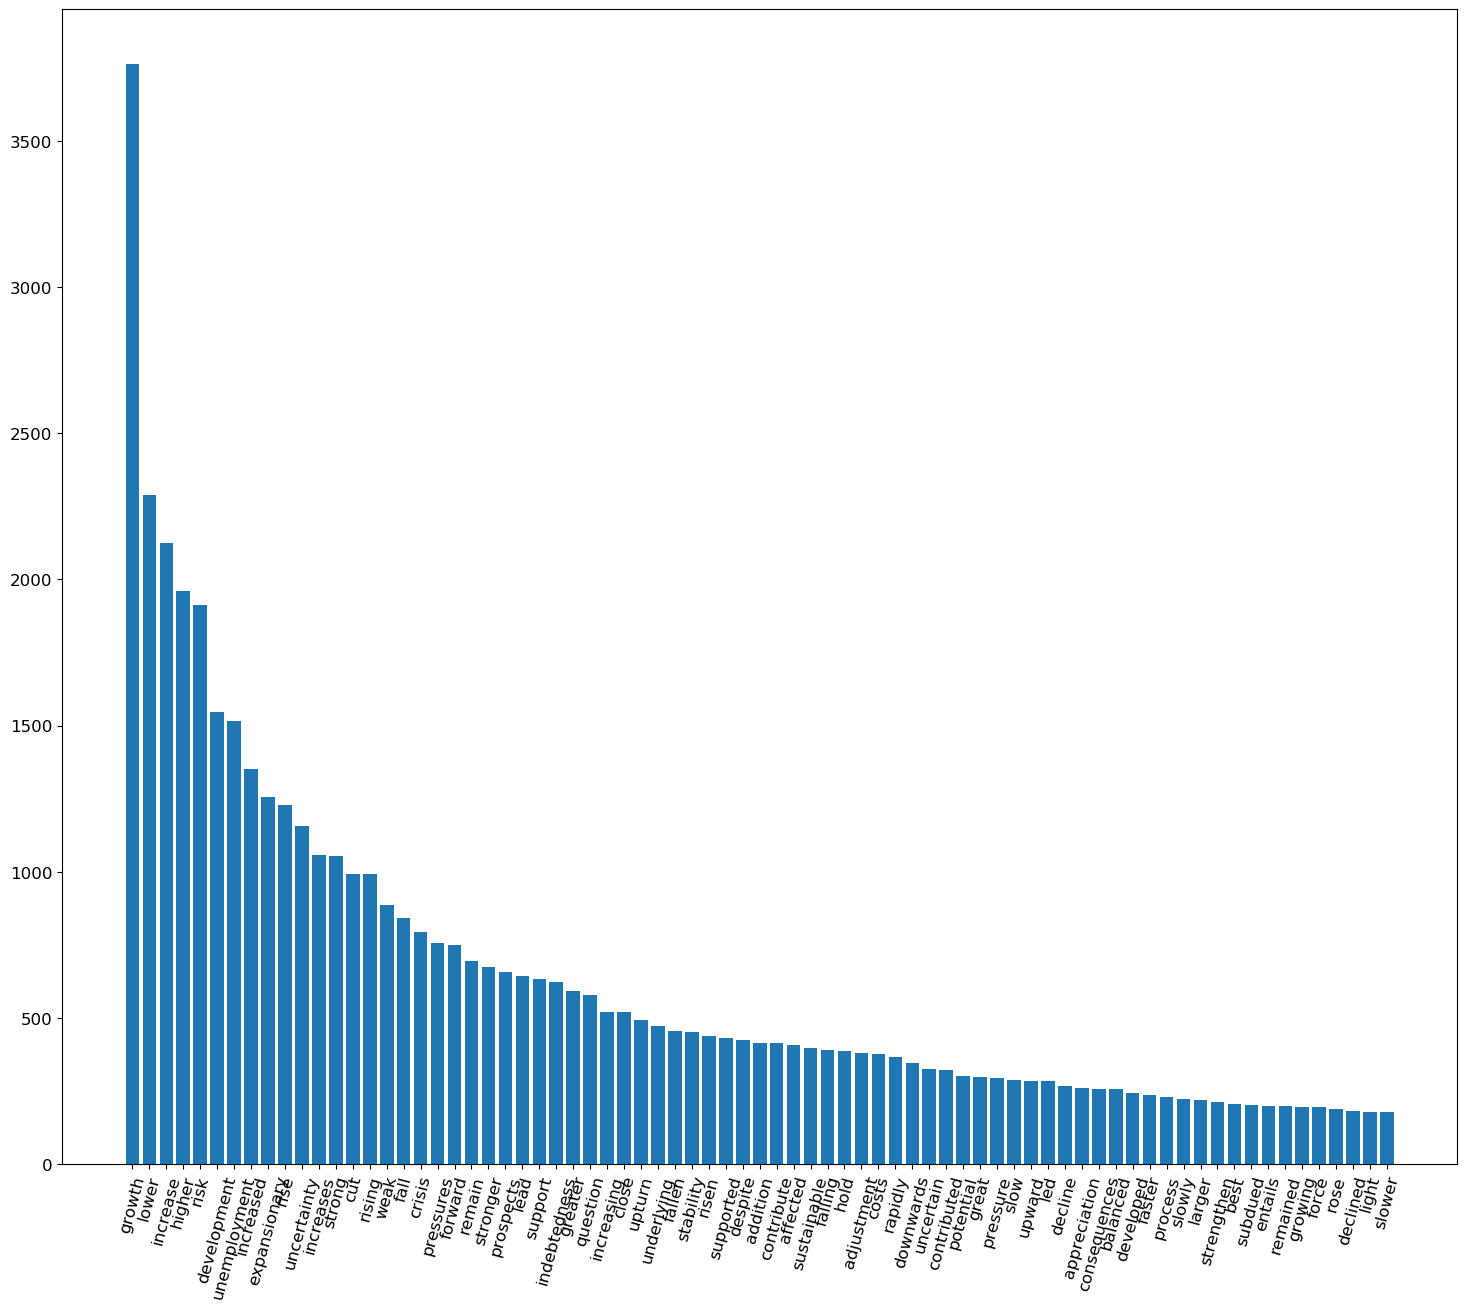

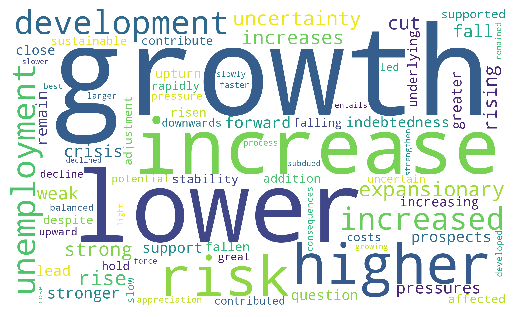

In [20]:
# Takes inputs:
    # - lexicon: A set of words, which will be applied on the PDF-files
    # - file_path: The file path to your folder containing the specific PDF-files (names on the PDF-files are: pppXXXXXXe)
    # - n: (int) The n most common words will be added to the dictionary
    # - Word_Cloud: If a wordcloud is wanted, write: 1, as input. Creates a wordcloud with n words
# Returns:
    # - A dictionary containing the n most common words as keys, and the number of times the words are mentioned as values

def dic_wordcounting(lexicon, file_path, n, Word_Cloud):
    
    wordc_df = neu_count(lexicon, file_path)
    
    wordc_dic = Counter([])
    for elem in wordc_df[0]:
        a = Counter(elem)
        wordc_dic = wordc_dic + a
        
    wordc_dic = dict(sorted(wordc_dic.items(), key = lambda x: x[1], reverse = True))
    
    wordc_lst = list(wordc_dic.items())
    del wordc_lst[n:]
    wordc_dic = dict(wordc_lst)
    
    
    plt.style.use('default')
    plt.rcParams.update({'font.size': 12})
    plt.rcParams['lines.markersize'] = 4
    plt.figure(figsize=(18, 15))
    
    plt.bar(range(len(wordc_dic)), list(wordc_dic.values()), align='center')
    plt.xticks(range(len(wordc_dic)), list(wordc_dic.keys()), rotation = 75)
    
    print(wordc_dic)
    plt.show()
    
    if Word_Cloud == 1:
        wc = WordCloud(background_color="white",width=2000,height=1300,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(wordc_dic)
        
        plt.axis("off")
        plt.figure
        plt.imshow(wc)
    return wordc_dic

dic_wordcounting(neu_words, basedir, 75, 1)

In [6]:
wordc_dic = Counter([])
for elem in wordc_df[0]:
    a = Counter(elem)
    wordc_dic = wordc_dic + a

wordc_dic = dict(sorted(wordc_dic.items(), key = lambda x: x[1], reverse = True))

n = 75

wordc_lst = list(wordc_dic.items())
del wordc_lst[n:]
wordc_dic = dict(wordc_lst)

print(wordc_dic)

{'growth': 3762, 'lower': 2288, 'increase': 2123, 'higher': 1959, 'risk': 1914, 'development': 1545, 'unemployment': 1516, 'increased': 1350, 'expansionary': 1255, 'rise': 1228, 'uncertainty': 1156, 'increases': 1058, 'strong': 1054, 'cut': 994, 'rising': 993, 'weak': 886, 'fall': 841, 'crisis': 793, 'pressures': 756, 'forward': 748, 'remain': 695, 'stronger': 674, 'prospects': 658, 'lead': 645, 'support': 632, 'indebtedness': 624, 'greater': 593, 'question': 579, 'increasing': 521, 'close': 519, 'upturn': 494, 'underlying': 474, 'fallen': 454, 'stability': 453, 'risen': 437, 'supported': 430, 'despite': 425, 'addition': 415, 'contribute': 413, 'affected': 409, 'sustainable': 397, 'falling': 391, 'hold': 386, 'adjustment': 381, 'costs': 376, 'rapidly': 368, 'downwards': 345, 'uncertain': 327, 'contributed': 321, 'potential': 300, 'great': 297, 'pressure': 294, 'slow': 288, 'upward': 284, 'led': 284, 'decline': 269, 'appreciation': 259, 'consequences': 257, 'balanced': 256, 'developed':

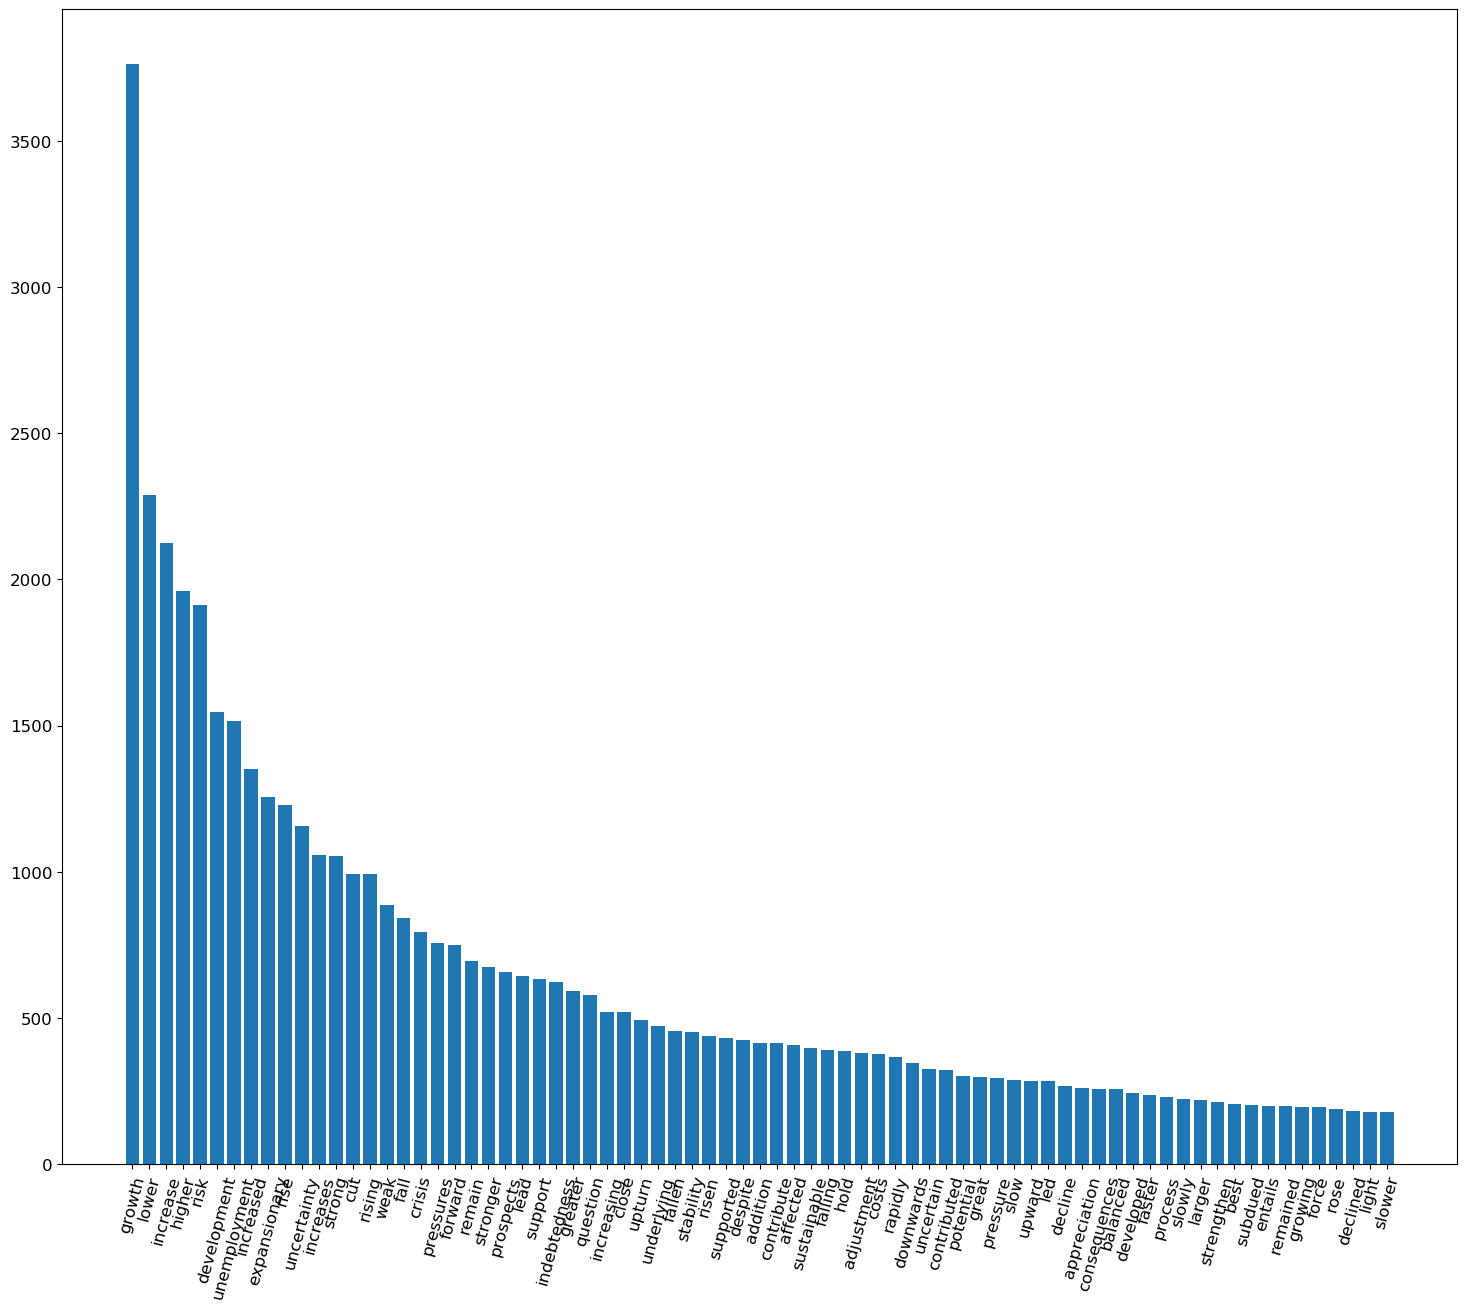

In [7]:
plt.style.use('default')
plt.rcParams.update({'font.size': 12})
plt.rcParams['lines.markersize'] = 4
plt.figure(figsize=(18, 15))

plt.bar(range(len(wordc_dic)), list(wordc_dic.values()), align='center')
plt.xticks(range(len(wordc_dic)), list(wordc_dic.keys()), rotation = 75)

plt.show()

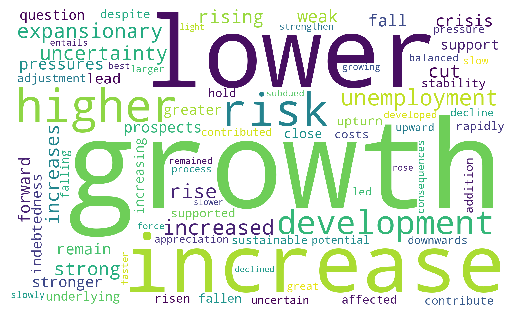

In [16]:
#cb_logo = np.array(Image.open(r'C:\Users\sebag\Documents\GitHub\SDS Group 35\sveriges_riksbank_2_png.png'))

wc = WordCloud(background_color="white",width=2000,height=1200,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(wordc_dic)

plt.axis("off")
plt.figure
plt.imshow(wc)